In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

X_train_fs = pd.read_csv('./X_train.csv', error_bad_lines=False, sep=',')
X_test_fs = pd.read_csv('./X_test.csv', error_bad_lines=False, sep=',')
y_train = pd.read_csv('./y_train.csv', error_bad_lines=False, sep=',')
y_test = pd.read_csv('./y_test.csv', error_bad_lines=False, sep=',')

#df = df.drop(df.columns[[0,1,5]], axis = 1)
X_train_fs.shape, y_train.shape

((1051, 99), (1051, 1))

In [16]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [17]:
#
# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=50,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train_fs, y_train)

y_predict = bgclassifier.predict(X_test_fs)
#
# Model scores on test and training data
#
bgclassifier.score(X_test_fs, y_test)

print(' training score: {}'.format(bgclassifier.score(X_train_fs, y_train)))
print(' testing score: {}'.format(bgclassifier.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of bgclassifier is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.6022835394862036
 testing score: 0.7439024390243902
Accuracy Score of bgclassifier is : 0.7439024390243902
Confusion Matrix : 
[[  0  39]
 [  3 122]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.76      0.98      0.85       125

    accuracy                           0.74       164
   macro avg       0.38      0.49      0.43       164
weighted avg       0.58      0.74      0.65       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


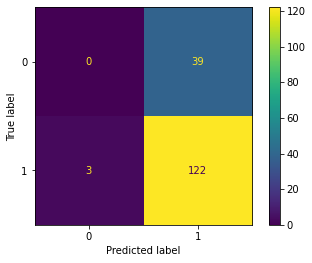

In [18]:
plot_confusion_matrix(bgclassifier, X_test_fs, y_test)
plt.show()